# Handle Imbalanced Dataset

## Exploratory Data Analysis

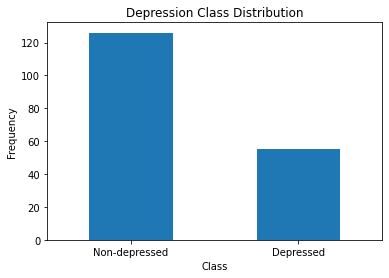

The ratio of negative to positive cases is 2.29.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/clean_compiled_transcripts.csv")

count_classes = pd.value_counts(df['PHQ_Binary'])
count_classes.plot(kind = 'bar', rot=0)
labels = ["Non-depressed", "Depressed"]

plt.title("Depression Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

print(f"The ratio of negative to positive cases is {round(count_classes[0] / count_classes[1], 2)}.")

Clearly, the dataset is highly imbalanced and is likely to result in poor performance. We should strive for 50:50 during training.

## Split the dataset
There are 2 reasons for splitting the dataset first:
1. We need to convert transcripts to word embeddings. The tokenizer should only be trained on the train set, instead of the entire corpus.
2. Due to an imbalanced dataset, we will be applying oversampling techniques later. Splitting first prevents the possibility of the exact same observations being present in both the train and test sets, which could lead to overfitting and poor generalization to the test data.

In [2]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test = train_test_split(df.Transcript, df.PHQ_Binary, test_size=0.2, random_state=42)

## Convert transcripts to word embeddings

In [3]:
# Tokenization and padding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_raw)
vocab_size = len(tokenizer.word_index) + 1

Using TensorFlow backend.


In [4]:
maxlen = 1000 # cut texts after this number of words

def prepare(X):
    X_seq = tokenizer.texts_to_sequences(X) # convert text to sequence
    X_mat = sequence.pad_sequences(X_seq, maxlen=maxlen) # word embedding matrix expects fixed size sentences
    
    return X_mat

In [5]:
X_train_mat = prepare(X_train_raw)
X_test = prepare(X_test_raw)

X_train_mat.shape, X_test.shape

((144, 1000), (37, 1000))

## Oversampling
We will be using oversampling techniques instead of undersampling because our dataset given is very small and we do not want to discard any data.

In [6]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.6/site-packages (0.7.0)


In [7]:
from imblearn.over_sampling import RandomOverSampler

# the ratio of minority class to majority class will be 1 after resampling
oversampling = RandomOverSampler(sampling_strategy=1)

X_train, y_train = oversampling.fit_sample(X_train_mat, y_train_raw)

X_train.shape, y_train.shape

((200, 1000), (200,))

Now we have `X_train`, `X_test`, `y_train`, `y_test` ready to be used for model testing.

# Models